In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


In [3]:
dfTest = pd.read_csv('titanic/test.csv')
dfTrain = pd.read_csv('titanic/train.csv')
dfTestRes = pd.read_csv('titanic/gender_submission.csv')
dfTest = pd.merge(dfTest, dfTestRes, on='PassengerId')


In [4]:
trainColm = ['Pclass','Age','Sex','Embarked','Fare','PassengerId']
xtrain = dfTrain[trainColm]
ytrain = dfTrain['Survived']
xtest = dfTest[trainColm]
ytest = dfTest['Survived']


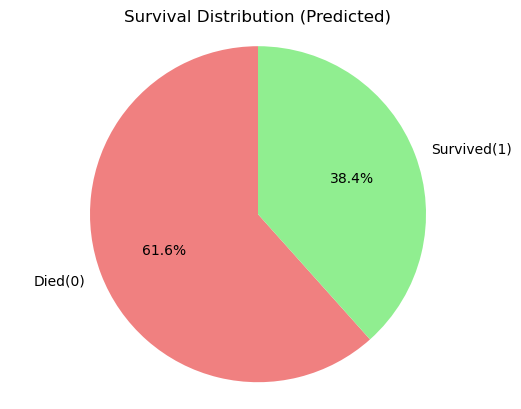

In [5]:
count = ytrain.value_counts()
labels = ['Died(0)','Survived(1)']
plt.pie(count,labels=labels,autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Survival Distribution (Predicted)')
plt.axis('equal')
plt.show()

In [6]:
xtrain.info()
xtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       891 non-null    int64  
 1   Age          714 non-null    float64
 2   Sex          891 non-null    object 
 3   Embarked     889 non-null    object 
 4   Fare         891 non-null    float64
 5   PassengerId  891 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 41.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    int64  
 1   Age          332 non-null    float64
 2   Sex          418 non-null    object 
 3   Embarked     418 non-null    object 
 4   Fare         417 non-null    float64
 5   PassengerId  418 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 22.

In [7]:
def getMetric(ytest, ypred):

    print(accuracy_score(ytest, ypred), ' this is accuracy score')
    print(confusion_matrix(ytest, ypred), ' this is confusion matrix')
    print(classification_report(ytest, ypred), ' this is classification report')
    print(precision_score(ytest, ypred), ' this is precision')
    print(recall_score(ytest, ypred), ' this is recall')

    return 

In [8]:
catFeature = ['Pclass','Sex','Embarked']
contFeature = ['Age','Fare']

catPipe = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

contPipe = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])

pprcs = ColumnTransformer([
    ('cat', catPipe, catFeature),
    ('num', contPipe, contFeature)
])

clf = Pipeline([
    ('prep', pprcs),
    ('model', LogisticRegression(max_iter=500))
])

xtrain = xtrain[contFeature+catFeature]
ytrain = ytrain
xtest = xtest[contFeature+catFeature]

clf.fit(xtrain, ytrain)
ypred = clf.predict(xtest)
getMetric( ytest, ypred)

0.9545454545454546  this is accuracy score
[[253  13]
 [  6 146]]  this is confusion matrix
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       266
           1       0.92      0.96      0.94       152

    accuracy                           0.95       418
   macro avg       0.95      0.96      0.95       418
weighted avg       0.96      0.95      0.95       418
  this is classification report
0.9182389937106918  this is precision
0.9605263157894737  this is recall


#two MODEL

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier


# Load only train data
df = pd.read_csv('titanic/train.csv')

# Define features and label
features = ['Pclass','Age','Sex','Embarked','Fare']
X = df[features]
y = df['Survived']

# Split for training/testing
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

catFeature = ['Sex','Embarked','Pclass']
contFeature = ['Age','Fare']

catPipe = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

contPipe = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

pprscDos = ColumnTransformer([
    ('cat', catPipe, catFeature),
    ('num', contPipe, contFeature)
])


lr = LogisticRegression(max_iter=500, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Voting ensemble
ensemble = VotingClassifier(
    estimators=[('lr', lr), ('rf', rf)],
    voting='soft'  
)

modelTwo = Pipeline([
    ('preppr', pprscDos),
    ('ensemble', ensemble)
])

modelTwo.fit(xtrain, ytrain)
ypred = modelTwo.predict(xtest)
getMetric(ytest, ypred)



0.8324022346368715  this is accuracy score
[[100  10]
 [ 20  49]]  this is confusion matrix
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       110
           1       0.83      0.71      0.77        69

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179
  this is classification report
0.8305084745762712  this is precision
0.7101449275362319  this is recall


In [31]:
xtest


,Pclass,Age,Sex,Embarked,Fare
565,3,24.0,male,S,24.1500
160,3,44.0,male,S,16.1000
553,3,22.0,male,C,7.2250
860,3,41.0,male,S,14.1083
241,3,NaN,female,Q,15.5000
...,...,...,...,...,...
880,2,25.0,female,S,26.0000
91,3,20.0,male,S,7.8542
883,2,28.0,male,S,10.5000
473,2,23.0,female,C,13.7917


In [11]:
import pandas as pd

# Get feature names from the ColumnTransformer
feature_names = pprscDos.get_feature_names_out()

# Convert array to DataFrame with those names and original index
xtrain_df = pd.DataFrame(xtrainprs, columns=feature_names, index=xtrain.index)
xtrain_df

NameError: name 'xtrainprs' is not defined

#THIRD MODEL

In [13]:
traintres = pd.read_csv('titanic/train.csv')
testtres = pd.read_csv('titanic/test.csv')
testsurv = pd.read_csv('titanic/gender_submission.csv')
colm = ['Age','Sex','Pclass','Fare','Embarked']
catColm = ['Sex','Pclass','Embarked']
contColm = ['Age','Fare']
xtraintres = traintres[colm]
xtesttres = testtres[colm]
ytraintres = traintres['Survived']
ytesttres = testsurv

cattrespipe = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

conttrespipe = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent'))
])

prs = ColumnTransformer([
    ('cat', cattrespipe, catColm),
    ('num', conttrespipe, contColm)
])

prs.fit(xtraintres)

xtraintres = prs.transform(xtraintres)
xtesttres = prs.transform(xtesttres)

modelThree = LogisticRegression(max_iter=500)
modelThree.fit(xtraintres, ytraintres)
ypredtres = modelThree.predict(xtesttres)
getMetric(ytesttres['Survived'], ypredtres)

submission = pd.DataFrame({
    'PassengerId': testtres['PassengerId'],
    'Survived': ypredtres
})

submission.to_csv('titanic_submission.csv', index=False)

0.9569377990430622  this is accuracy score
[[254  12]
 [  6 146]]  this is confusion matrix
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       266
           1       0.92      0.96      0.94       152

    accuracy                           0.96       418
   macro avg       0.95      0.96      0.95       418
weighted avg       0.96      0.96      0.96       418
  this is classification report
0.9240506329113924  this is precision
0.9605263157894737  this is recall


In [32]:
joblib.dump(prs, 'titanic_preprocessor_Three.pkl')


['titanic_preprocessor_Three.pkl']

In [26]:
xtraintres

array([[ 0.    ,  1.    ,  0.    , ...,  1.    , 22.    ,  7.25  ],
       [ 1.    ,  0.    ,  1.    , ...,  0.    , 38.    , 71.2833],
       [ 1.    ,  0.    ,  0.    , ...,  1.    , 26.    ,  7.925 ],
       ...,
       [ 1.    ,  0.    ,  0.    , ...,  1.    , 24.    , 23.45  ],
       [ 0.    ,  1.    ,  1.    , ...,  0.    , 26.    , 30.    ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    , 32.    ,  7.75  ]])

In [14]:
featurename = prs.get_feature_names_out()
xtraintresdf = pd.DataFrame(xtraintres, columns=featurename)
xtraintresdf

,cat__Sex_female,cat__Sex_male,cat__Pclass_1,cat__Pclass_2,cat__Pclass_3,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,num__Age,num__Fare
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,22.0,7.2500
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,38.0,71.2833
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,26.0,7.9250
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,35.0,53.1000
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,35.0,8.0500
...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,27.0,13.0000
887,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,19.0,30.0000
888,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,24.0,23.4500
889,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,26.0,30.0000


In [15]:
xanalysis = pd.read_csv('titanic/train.csv')
oneclass = xanalysis[xanalysis['Pclass'] == 1]
twoclass = xanalysis[xanalysis['Pclass'] == 2]
threeclass = xanalysis[xanalysis['Pclass'] == 3]


In [16]:
def getLastFourDigitsOfTicket( ticket ):
    
    ticket = str(ticket)
    digitsonly = ''

    for char in ticket:
        if char.isdigit():
            digitsonly += char
    
    if len(digitsonly)<3:
        return digitsonly
    else:
        return digitsonly[-3:]


def assign_general_family_ids(df):
    df = df.copy()

    # Fill missing data
    df['Cabin'] = df['Cabin'].fillna('No Cabin Provided')
    df['Ticket'] = df['Ticket'].fillna('Unknown')
    
    # Extract surname
    df['Surname'] = df['Name'].apply(lambda x: x.split(',')[0].strip())
    
    # Filter potential families (any relationship indicator)
    related = df[(df['SibSp'] > 0) | (df['Parch'] > 0)]

    # Create a family key using combined identifiers
    related['FamilyKey'] = (
        related['Surname'] + "_" +
        related['Ticket'].astype(str) + "_" +
        related['Cabin'].astype(str) + "_" +
        related['Pclass'].astype(str)
    )

    # Map each unique FamilyKey to a FamilyID
    family_id_map = {key: i+1 for i, key in enumerate(related['FamilyKey'].unique())}
    related['FamilyID'] = related['FamilyKey'].map(family_id_map)

    # Merge FamilyID back to the original dataframe
    df = df.merge(related[['PassengerId', 'FamilyID']], on='PassengerId', how='left')

    return df


df = pd.read_csv('titanic/train.csv')
df = assign_general_family_ids(df)

# See families
family_summary = df[df['FamilyID'].notna()].groupby('FamilyID').agg(
    FamilySize=('PassengerId', 'count'),
    Survivors=('Survived', 'sum')
).sort_values(by='FamilySize', ascending=False)

print(len(family_summary))


def assign_wealth_status(row):
    if (row['Fare'] > 74 and row['Pclass'] == 2) or (row['Fare'] > 25 and row['Pclass'] == 1):
        return 1
    elif (row['Fare'] < 25 and (row['Pclass'] == 1 or row['Pclass'] == 2)) or (row['Fare'] > 10 and (row['Pclass'] == 2 or row['Pclass'] == 3)):
        return 2
    elif row['Fare'] < 10 and (row['Pclass'] == 3 or row['Pclass'] == 2):
        return 3
    else:
        return 0  # default category if none matches




210


C:\Users\91766\AppData\Local\Temp\ipykernel_23968\520513844.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  related['FamilyKey'] = (
C:\Users\91766\AppData\Local\Temp\ipykernel_23968\520513844.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  related['FamilyID'] = related['FamilyKey'].map(family_id_map)


In [17]:
xanalysis = assign_general_family_ids(xanalysis)
xanalysis['tickets'] = xanalysis['Ticket'].apply(getLastFourDigitsOfTicket)
xanalysis = xanalysis.drop('Ticket',axis=1)
xanalysis['FamilyID'] = xanalysis['FamilyID'].fillna('No Family')
xanalysis['FamilySize'] = xanalysis['SibSp'] + xanalysis['Parch'] + 1
xanalysis['FamilyExist'] =  xanalysis['FamilySize'] > 1 


C:\Users\91766\AppData\Local\Temp\ipykernel_23968\520513844.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  related['FamilyKey'] = (
C:\Users\91766\AppData\Local\Temp\ipykernel_23968\520513844.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  related['FamilyID'] = related['FamilyKey'].map(family_id_map)


In [18]:
xanalysis['WealthStatus'] = xanalysis.apply(assign_wealth_status, axis=1)


In [19]:
avg_fare_class1 = xanalysis[xanalysis['Pclass'] == 1]['Fare'].mean()
mode_fare_class1 = xanalysis[xanalysis['Pclass'] == 1]['Fare'].mode()
median_fare_class1 = xanalysis[xanalysis['Pclass'] == 1]['Fare'].median()
print("Average Fare for Class 1:", avg_fare_class1)
print("MMODE Fare for Class 1:", mode_fare_class1)
print("MDIAN Fare for Class 1:", median_fare_class1)
avg_fare_class2 = xanalysis[xanalysis['Pclass'] == 2]['Fare'].mean()
mode_fare_class2 = xanalysis[xanalysis['Pclass'] == 2]['Fare'].mode()
median_fare_class2 = xanalysis[xanalysis['Pclass'] == 2]['Fare'].median()
print("Average Fare for Class 2:", avg_fare_class2)
print("MODE Fare for Class 2:", mode_fare_class2)
print("MDIAN Fare for Class 2:", median_fare_class2)
avg_fare_class3 = xanalysis[xanalysis['Pclass'] == 3]['Fare'].mean()
mode_fare_class3 = xanalysis[xanalysis['Pclass'] == 3]['Fare'].mode()
median_fare_class3 = xanalysis[xanalysis['Pclass'] == 3]['Fare'].median()
print("Average Fare for Class 3:", avg_fare_class3)
print("MMODE Fare for Class 3:", mode_fare_class3)
print("MDIAN Fare for Class 3:", median_fare_class3)

Average Fare for Class 1: 84.1546875
MMODE Fare for Class 1: 0    26.55
Name: Fare, dtype: float64
MDIAN Fare for Class 1: 60.287499999999994
Average Fare for Class 2: 20.662183152173913
MODE Fare for Class 2: 0    13.0
Name: Fare, dtype: float64
MDIAN Fare for Class 2: 14.25
Average Fare for Class 3: 13.675550101832993
MMODE Fare for Class 3: 0    8.05
Name: Fare, dtype: float64
MDIAN Fare for Class 3: 8.05


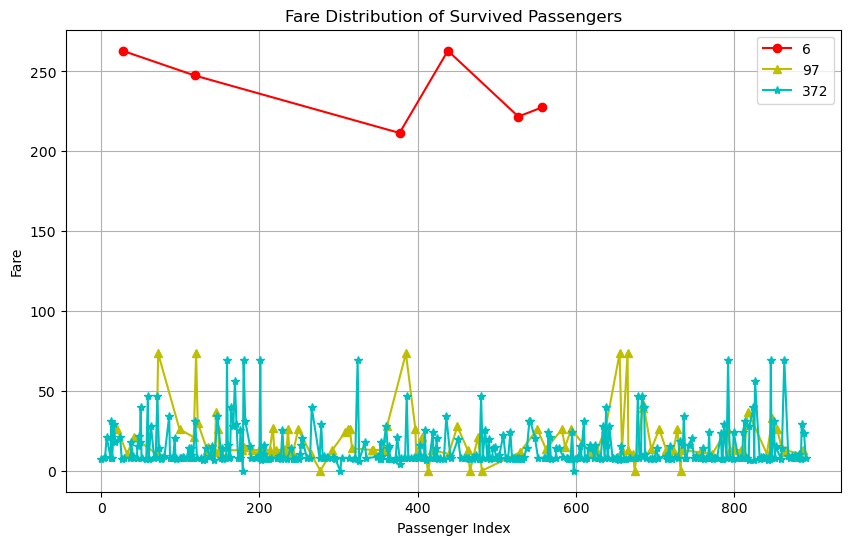

In [20]:
import matplotlib.pyplot as plt

# Filter survivors
import matplotlib.pyplot as plt

survivors = xanalysis[xanalysis['Survived'] ==0]

above_200 = survivors[survivors['Fare'] > 200]
between_100_200 = survivors[(survivors['Fare'] <= 200) & (survivors['Fare'] > 100)]
below_100 = survivors[survivors['Fare'] <= 100]

classtwo = survivors[survivors['Pclass'] == 2]
classthree = survivors[survivors['Pclass'] == 3]


abov = len(above_200)
mid = len(between_100_200)
belo = len(below_100)
two = len(classtwo)
three = len(classthree)

plt.figure(figsize=(10, 6))
plt.plot(above_200.index, above_200['Fare'], 'ro-', label=abov)
#plt.plot(between_100_200.index, between_100_200['Fare'], 'go-', label=mid)
#plt.plot(below_100.index, below_100['Fare'], 'bo-', label=belo)

plt.plot(classtwo.index, classtwo['Fare'], 'y^-', label=two)
plt.plot(classthree.index, classthree['Fare'], 'c*-', label=three)
plt.title("Fare Distribution of Survived Passengers")
plt.xlabel("Passenger Index")
plt.ylabel("Fare")
plt.legend()
plt.grid(True)
plt.show()

plt.show()


In [21]:
xanalysis[xanalysis['Pclass']==3].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Surname,FamilyID,tickets,FamilySize,FamilyExist,WealthStatus
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,No Cabin Provided,S,Braund,1.0,171,2,True,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,No Cabin Provided,S,Heikkinen,No Family,282,1,False,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,No Cabin Provided,S,Allen,No Family,450,1,False,3
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,No Cabin Provided,Q,Moran,No Family,877,1,False,3
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,No Cabin Provided,S,Palsson,4.0,909,5,True,2


# ONE MODEL

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

# Split
xcuatro = xanalysis.drop(['Survived'], axis=1)
drop_cols = ['PassengerId', 'Name', 'Cabin', 'Surname', 'FamilyID', 'tickets']
xcuatro = xcuatro.drop(columns=drop_cols, axis=1)
ycuatro = xanalysis['Survived']
xtraincuatro, xtestcuatro, ytraincuatro, ytestcuatro = train_test_split(xcuatro, ycuatro, random_state=42, train_size=0.9)

# Preprocessing
catcolmcuatro = ['Pclass', 'Sex', 'FamilyExist', 'WealthStatus', 'Embarked']
constcolmcuatro = ['Age', 'Fare', 'FamilySize']

catpipecuatro = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

contpipecuatro = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])

ppl = ColumnTransformer([
    ('cat', catpipecuatro, catcolmcuatro),
    ('num', contpipecuatro, constcolmcuatro)
])

# Models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=500, random_state=42)

# Ensemble
ensemble = VotingClassifier(
    estimators=[('rf', rf), ('dt', dt), ('lasso', lasso)],
    voting='soft'
)

# Main model
modelOne = Pipeline([
    ('preppr', ppl),
    ('ensemble', ensemble)
])

# Fit model
modelOne.fit(xtraincuatro, ytraincuatro)
ypredcuatro = modelOne.predict(xtestcuatro)


# 1. Preprocess to get transformed feature names
ppl.fit(xtraincuatro)
feature_names = ppl.get_feature_names_out()

# 2. Train each base model independently
Xtrain_transformed = ppl.transform(xtraincuatro)

# --- LASSO Coefficients ---
lasso.fit(Xtrain_transformed, ytraincuatro)
lasso_coefs = pd.Series(lasso.coef_[0], index=feature_names)
lasso_importance = lasso_coefs.abs().sort_values(ascending=False)
print("\nTop LASSO Features:")
print(lasso_importance.head(10))

# --- Random Forest Feature Importances ---
rf.fit(Xtrain_transformed, ytraincuatro)
rf_importance = pd.Series(rf.feature_importances_, index=feature_names)
rf_top = rf_importance.sort_values(ascending=False)
print("\nTop Random Forest Features:")
print(rf_top.head(10))

# --- Decision Tree Feature Importances ---
dt.fit(Xtrain_transformed, ytraincuatro)
dt_importance = pd.Series(dt.feature_importances_, index=feature_names)
dt_top = dt_importance.sort_values(ascending=False)
print("\nTop Decision Tree Features:")
print(dt_top.head(10))



Top LASSO Features:
cat__Sex_female          1.345496
cat__Sex_male            1.247910
cat__Pclass_3            0.986638
cat__WealthStatus_1      0.971309
num__FamilySize          0.547354
cat__FamilyExist_True    0.526746
num__Age                 0.395523
cat__Embarked_S          0.255011
cat__Pclass_2            0.123079
num__Fare                0.078019
dtype: float64

Top Random Forest Features:
num__Age               0.263830
num__Fare              0.232088
cat__Sex_female        0.140377
cat__Sex_male          0.127835
num__FamilySize        0.061372
cat__Pclass_3          0.045782
cat__WealthStatus_1    0.023278
cat__Pclass_2          0.017664
cat__WealthStatus_3    0.016413
cat__Pclass_1          0.015392
dtype: float64

Top Decision Tree Features:
cat__Sex_male             0.304008
num__Age                  0.237961
num__Fare                 0.228929
cat__Pclass_3             0.088463
num__FamilySize           0.066141
cat__WealthStatus_1       0.030233
cat__FamilyExist_Fals

In [23]:
getMetric(ytestcuatro, ypredcuatro)

0.8111111111111111  this is accuracy score
[[44 10]
 [ 7 29]]  this is confusion matrix
              precision    recall  f1-score   support

           0       0.86      0.81      0.84        54
           1       0.74      0.81      0.77        36

    accuracy                           0.81        90
   macro avg       0.80      0.81      0.81        90
weighted avg       0.82      0.81      0.81        90
  this is classification report
0.7435897435897436  this is precision
0.8055555555555556  this is recall


In [24]:
xtestcuatro


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,FamilyExist,WealthStatus
709,3,male,NaN,1,1,15.2458,C,3,True,2
439,2,male,31.0,0,0,10.5000,S,1,False,2
840,3,male,20.0,0,0,7.9250,S,1,False,3
720,2,female,6.0,0,1,33.0000,S,2,True,2
39,3,female,14.0,1,0,11.2417,C,2,True,2
...,...,...,...,...,...,...,...,...,...,...
493,1,male,71.0,0,0,49.5042,C,1,False,1
215,1,female,31.0,1,0,113.2750,C,2,True,1
309,1,female,30.0,0,0,56.9292,C,1,False,1
822,1,male,38.0,0,0,0.0000,S,1,False,2


In [25]:
#EXPORT


import joblib

# Save entire pipeline including preprocessing and ensemble
joblib.dump(modelOne, 'titanic_model_One.pkl')
joblib.dump(modelTwo, 'titanic_model_Two.pkl')
joblib.dump(modelThree, 'titanic_model_Three.pkl')

['titanic_model_Three.pkl']